In this notebook, I will demonstrate a simple example of overfitting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 100
x = np.linspace(0, 1, n)
y = (1-x)**2 + x

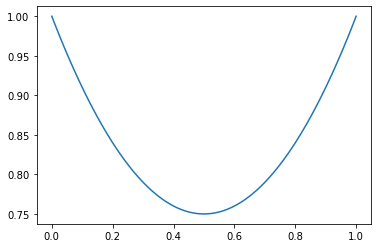

In [3]:
plt.plot(x, y)

In [4]:
y_noisy = y + np.random.randn(y.shape[0]) * 0.1

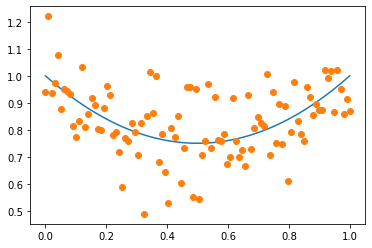

In [5]:
plt.plot(x, y)
plt.plot(x, y_noisy, 'o')

Decision trees are super easy to overfit.

In [6]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

def fit_and_eval(depth_of_tree):
    
    coefs = np.polyfit(x, y_noisy, depth_of_tree)
    y_pred = np.polyval(coefs, x)
    x_reshaped  = x[:, None]
    mod = DecisionTreeRegressor(max_depth=depth_of_tree).fit(x_reshaped, y_noisy)
    y_pred = mod.predict(x_reshaped)
    plt.plot(x, y_pred, label=f'{depth_of_tree}', lw=2)
    return mod

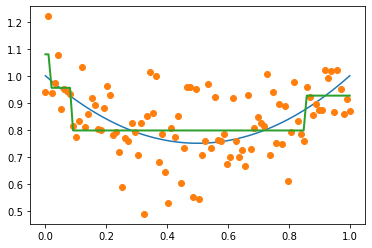

In [7]:
plt.plot(x, y)
plt.plot(x, y_noisy, 'o')
mod = fit_and_eval(2)

Here is a print-out of the decision tree.

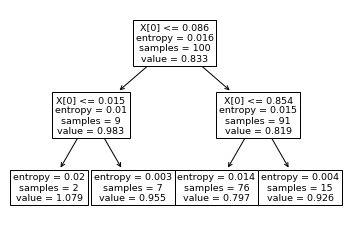

In [8]:
plot_tree(mod);

Using a deeper tree leads to overfitting.

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

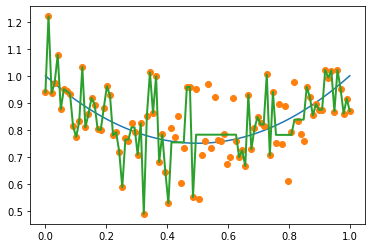

In [9]:
plt.plot(x, y)
plt.plot(x, y_noisy, 'o')
fit_and_eval(10)

This overfitting can be avoided using cross validation:

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x[:, None], y_noisy, test_size=0.4, random_state=0)

In [11]:
depths = np.r_[1:10]
test_scores  = []
train_scores = []

for max_depth in depths:
    mod = DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    train_score = mod.score(X_train, y_train)
    test_score = mod.score(X_test, y_test)

    test_scores.append(test_score)
    train_scores.append(train_score)
    
    print(f"Max Depth = {max_depth} ; Train score = {train_score:.2f} ; Test score = {test_score:.2f}")

Max Depth = 1 ; Train score = 0.16 ; Test score = -0.00
Max Depth = 2 ; Train score = 0.26 ; Test score = 0.12
Max Depth = 3 ; Train score = 0.34 ; Test score = 0.17
Max Depth = 4 ; Train score = 0.38 ; Test score = 0.09
Max Depth = 5 ; Train score = 0.54 ; Test score = -0.02
Max Depth = 6 ; Train score = 0.63 ; Test score = -0.21
Max Depth = 7 ; Train score = 0.73 ; Test score = -0.61
Max Depth = 8 ; Train score = 0.81 ; Test score = -0.61
Max Depth = 9 ; Train score = 0.84 ; Test score = -0.62


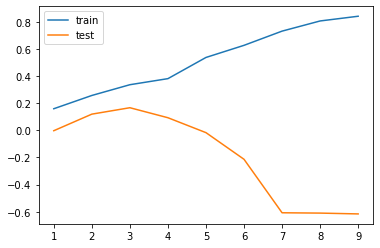

In [12]:
plt.plot(depths, train_scores, label='train')
plt.plot(depths, test_scores, label='test')
plt.legend()